In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np
import ld_gan
from ld_gan.visualize import gpu 

In [148]:
gpu()

name                           host                           epoch
--------------------------------------------------------------------
xf_11111_kde01.py              compvisgpu03                   258.9  
xf_11111_kde05.py              hcigpu03                       151.0  
xf_11111_kde10.py              hcigpu03                       160.06  
xf_11111_l128.py               compvisgpu03                   252.55  
xf_11111_l64.py                compvisgpu03                   259.16  
xf_11111_nn50_5_go.py          compvisgpu02                   67.19  
xf_11111_nn50_5_new.py         compvisgpu02                   0.16  
--------------------------------------------------------------------


7 projects running


* xf_11111_ri_fast   : --
* xf_11111_ri        : +
* xf_11111_rn        : --
* xf_11111_nn5       : +     --> iter:200
* xf_11111_shit      : ++
* xf_11111_rand256   : +++ 550

<IPython.core.display.Javascript object>


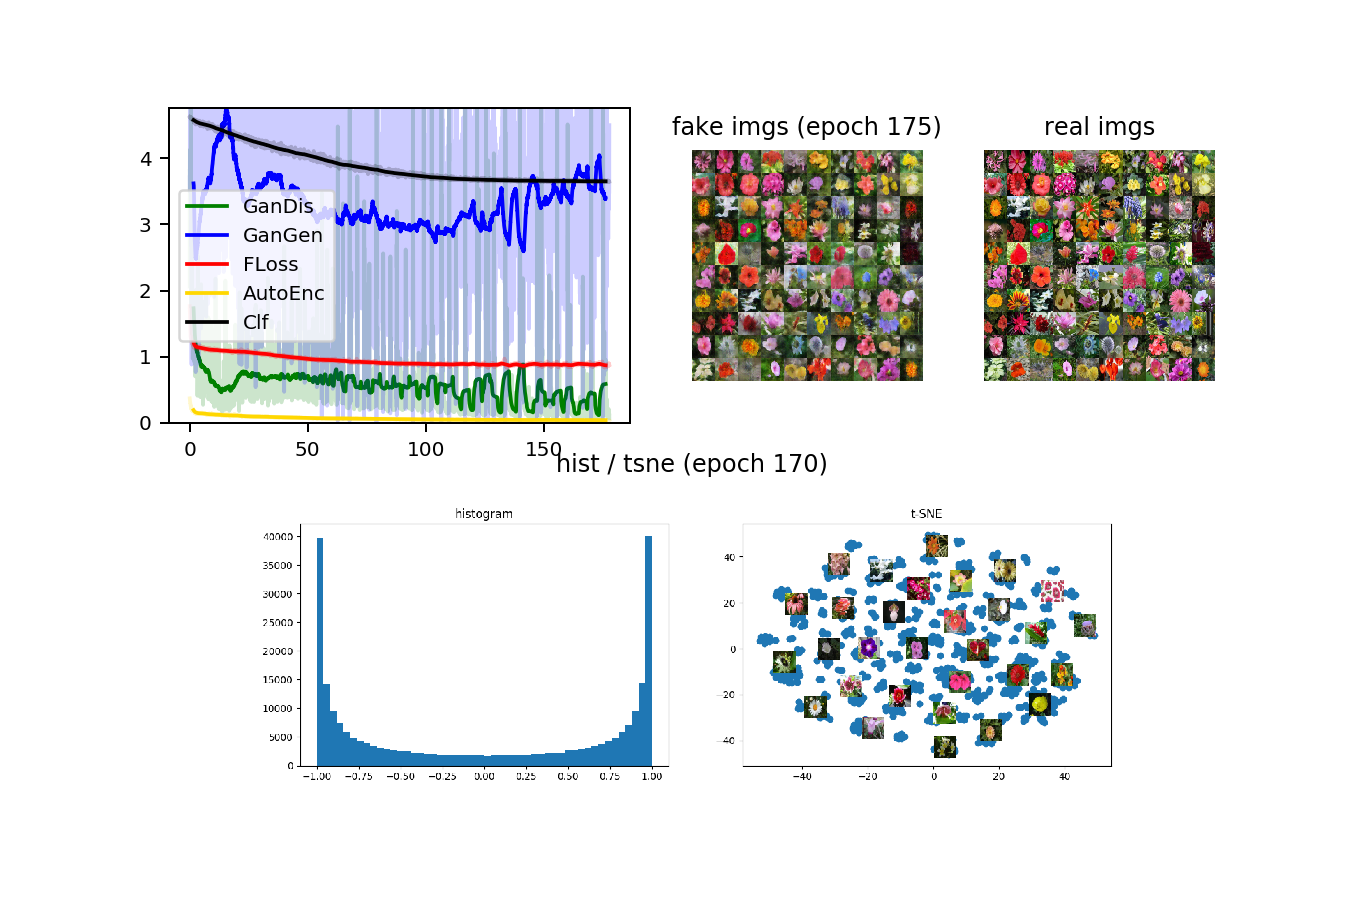

In [155]:
visualize.learning_curve_ia(
                            "xf_11111_kde10.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            #ymax=5, xmax=120,
                            #mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


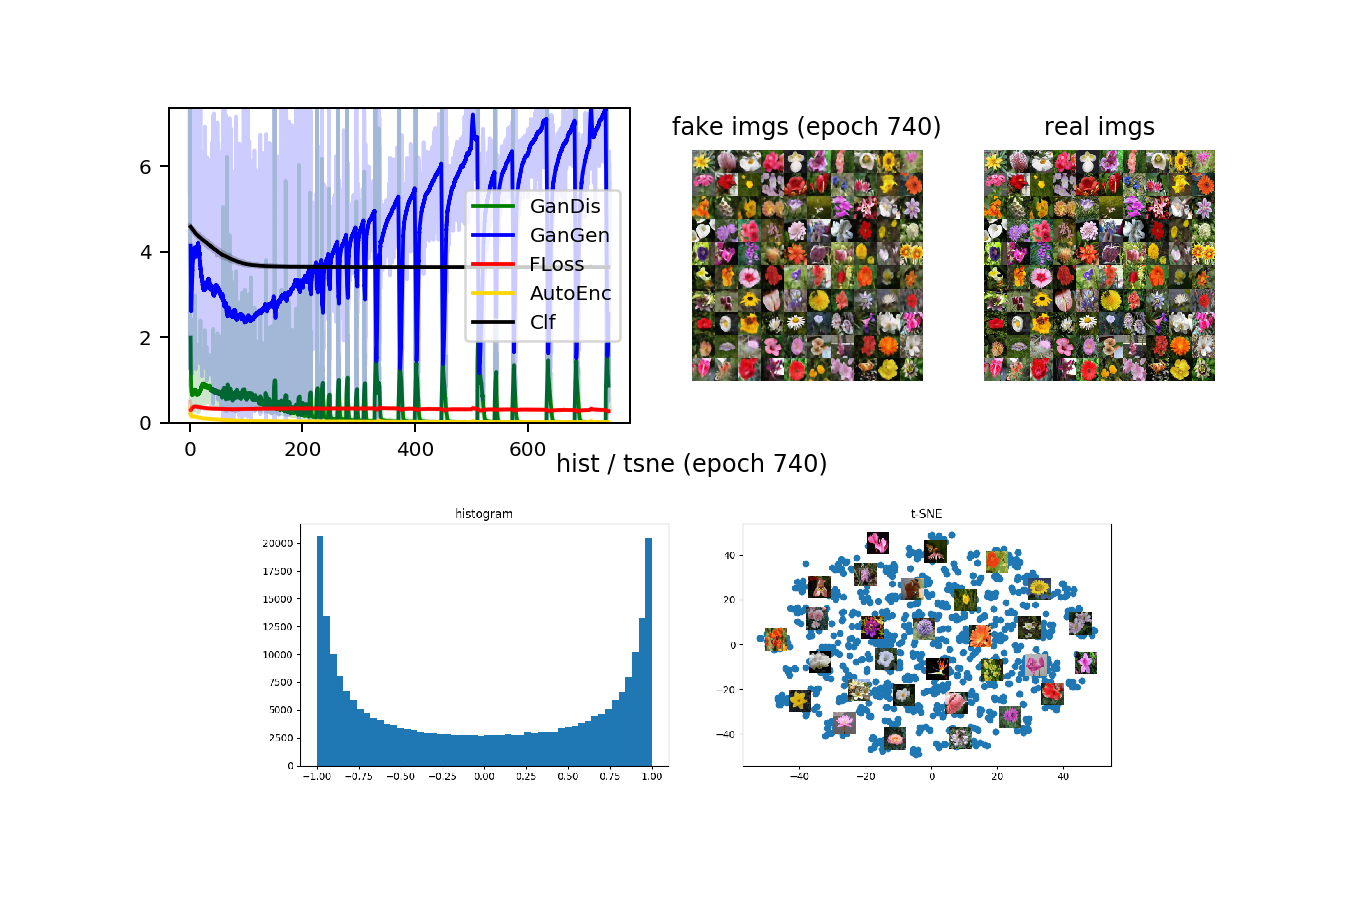

In [124]:
visualize.learning_curve_ia(
                            "xf_11111_t1.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            #ymax=5, xmax=50,
                            #mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


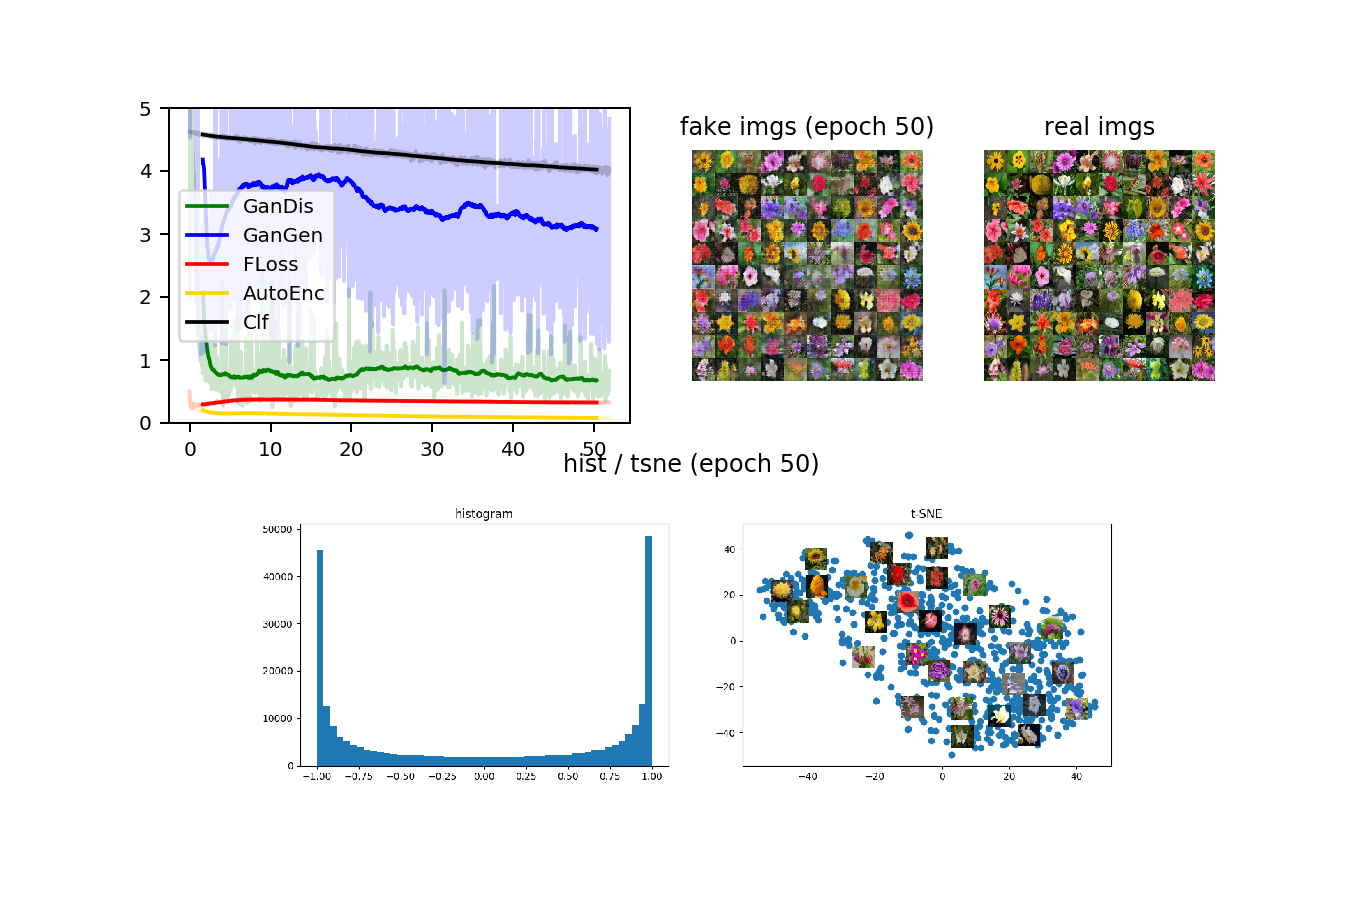

In [91]:
visualize.learning_curve_ia(
                            "xf_11111_shit.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            ymax=5,
                            #mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


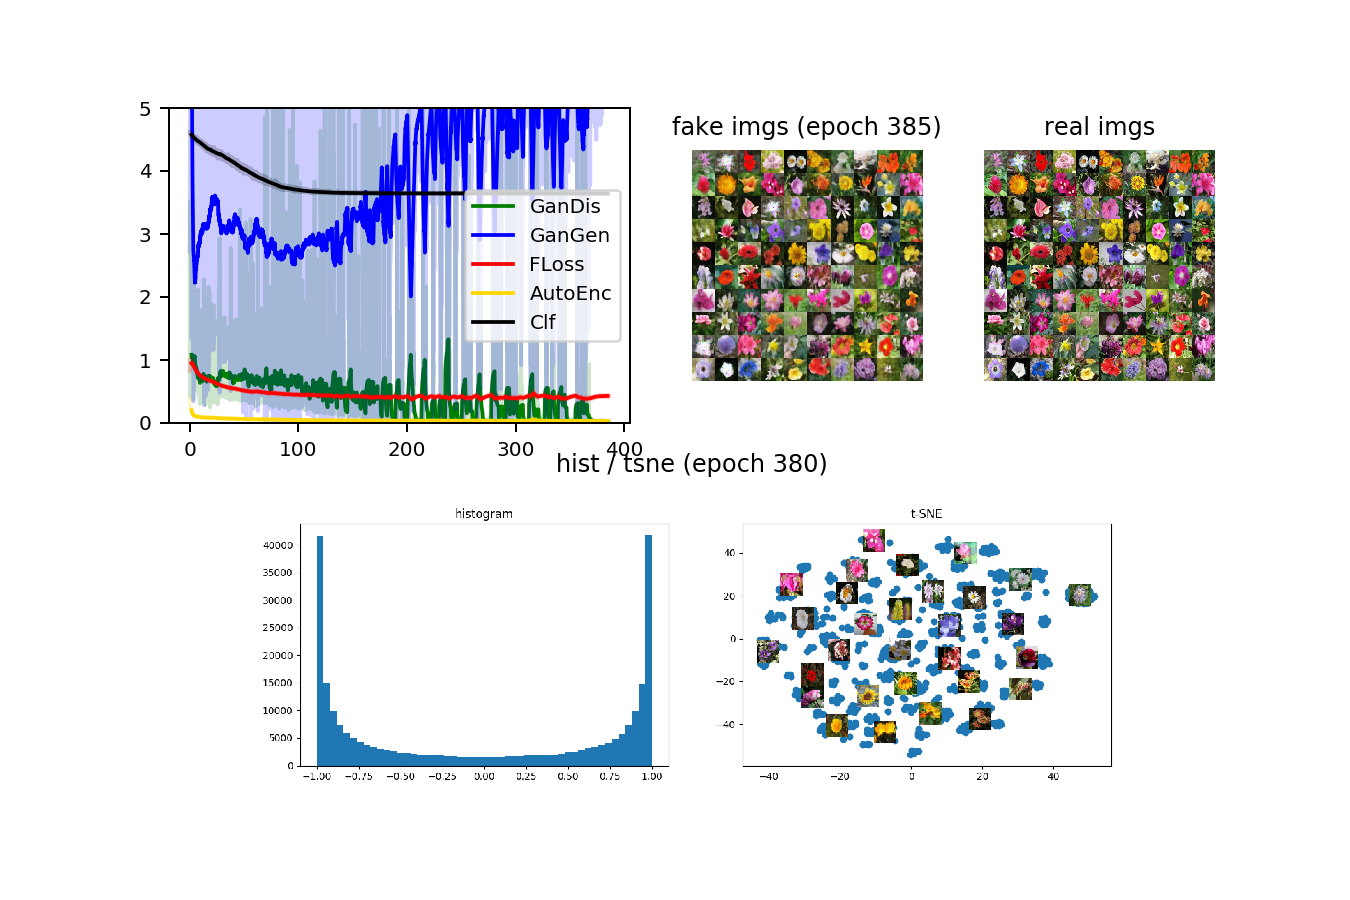

In [70]:
visualize.learning_curve_ia(
                            "xf_11111_rn.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            ymax=5,
                            mean = True
                            #mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


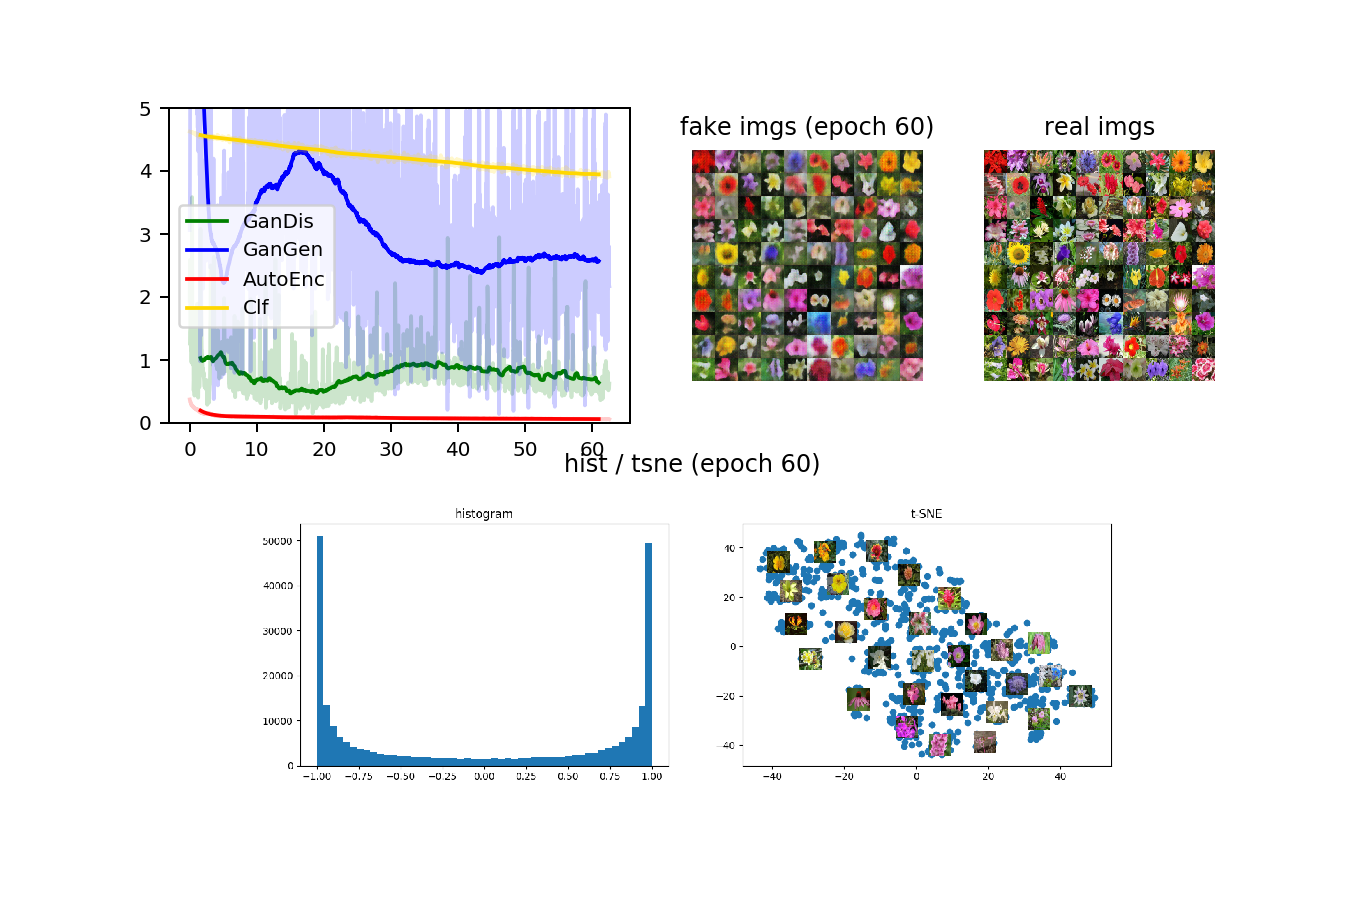

In [61]:
visualize.learning_curve_ia(
                            "xf_11011_rn.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            ymax=5,
                            #mean=True,
                            #logs_fname = "dis_score.txt"
                            #logs_fname = "clf_acc.txt"
                            )